In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('INTC_23112020.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.200766,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.199160,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.203978,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.203175,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.195948,12172800
...,...,...,...,...,...,...,...
10256,2020-11-16,46.040001,46.750000,45.790001,46.189999,46.189999,36306300
10257,2020-11-17,45.750000,46.119999,45.410000,45.529999,45.529999,31118000
10258,2020-11-18,45.549999,45.689999,45.040001,45.060001,45.060001,32817900
10259,2020-11-19,44.919998,45.669998,44.700001,45.619999,45.619999,29469100


In [4]:
df.shape

(10261, 7)

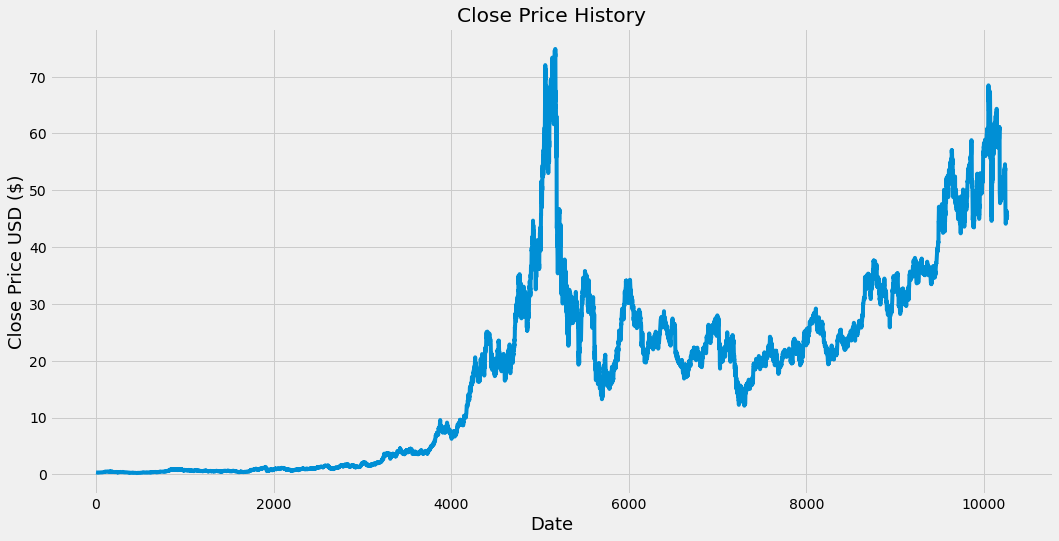

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

#Converting the dataframe to a numpy array
dataset = data.values

#number of rows to train the data
training_data_len = math.ceil( len(dataset) *.8)
training_data_len



8209

In [7]:
#Scale the all of the data to be values between 0 and 1 
#minmax scaling brings the value to the specufied range
scaler = MinMaxScaler(feature_range=(0, 1)) 

#fit and transform the data
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.001465  ],
       [0.00143012],
       [0.00153475],
       ...,
       [0.60065019],
       [0.60815095],
       [0.60507027]])

In [8]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
train_data

array([[0.001465  ],
       [0.00143012],
       [0.00153475],
       ...,
       [0.30249397],
       [0.29901149],
       [0.30048484]])

In [9]:
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
      print(x_train)
      print(y_train)
      print()

[array([0.001465  , 0.00143012, 0.00153475, 0.00151732, 0.00136035,
       0.00127315, 0.00129059, 0.00125571, 0.00111618, 0.00127315,
       0.00141268, 0.00143012, 0.001465  , 0.00137779, 0.00127315,
       0.00129059, 0.00120339, 0.00118595, 0.00118595, 0.00122083,
       0.0011685 , 0.00101155, 0.00094178, 0.00099411, 0.00095922,
       0.00113362, 0.00137779, 0.00139524, 0.00132547, 0.00129059,
       0.00132547, 0.00137779, 0.00139524, 0.001465  , 0.00151732,
       0.00149988, 0.00149988, 0.00144756, 0.00149988, 0.00148244,
       0.00156963, 0.0016394 , 0.00167428, 0.0017266 , 0.00174404,
       0.00169172, 0.00158707, 0.00153475, 0.00169172, 0.00167428,
       0.00177892, 0.00177892, 0.00184869, 0.00186613, 0.00174404,
       0.00181381, 0.00181381, 0.00177892, 0.00174404, 0.00179636])]
[0.0018486889713040596]



In [10]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(8149, 60)

In [11]:
#Reshape the data
#2d into 3d
#Samples,Timesteps, Features
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(8149, 60, 1)

In [12]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=40)

In [ ]:
#Creating Test data set
#new array containing values from 1551 to 2020
test_data = scaled_data[training_data_len - 60: , : ]

In [20]:
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ]  
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [21]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [22]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [23]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

<ipython-input-24-07a7af3d1b6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
<ipython-input-24-07a7af3d1b6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = Dates
<ipython-input-24-07a7af3d1b6e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

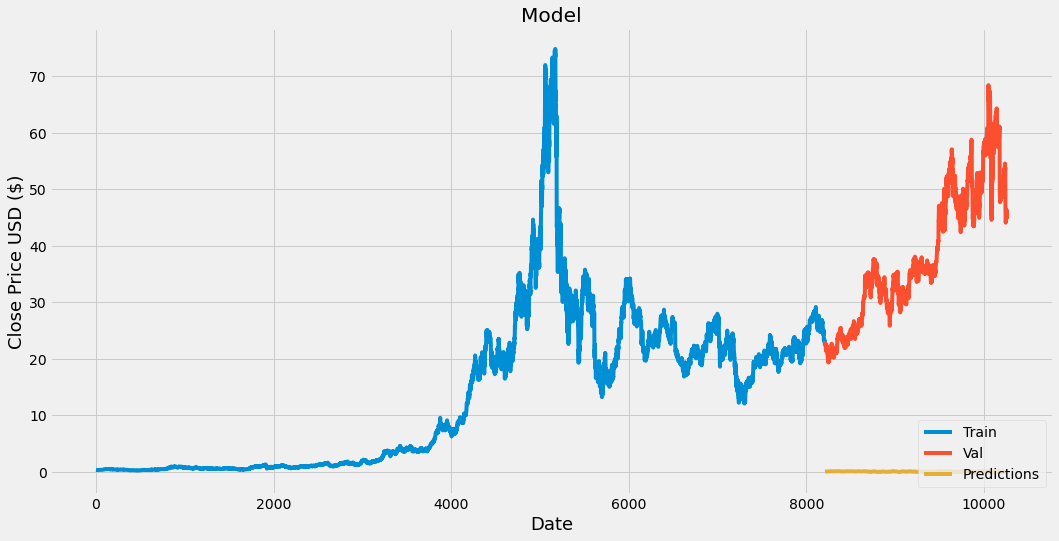

In [24]:
#Plot the data for the graph
Dates = df.filter(['Date'])
Adj_close = df.filter(['Adj Close'])
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Date'] = Dates
valid['Adj Close'] = Adj_close


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
valid

,Close,Predictions,Date,Adj Close
8209,23.090000,0.020412,2012-09-27,18.078850
8210,22.660000,0.022424,2012-09-28,17.742170
8211,22.760000,0.024251,2012-10-01,17.820469
8212,22.840000,0.026364,2012-10-02,17.883108
8213,22.549999,0.028815,2012-10-03,17.656048
...,...,...,...,...
10256,46.189999,-0.094023,2020-11-16,46.189999
10257,45.529999,-0.082197,2020-11-17,45.529999
10258,45.060001,-0.072173,2020-11-18,45.060001
10259,45.619999,-0.064242,2020-11-19,45.619999


In [27]:
dataframe.reset_index(drop=True)
dataframe = valid.reindex(['Date','Close','Adj Close','Predictions'],axis=1)
dataframe

NameError: name 'dataframe' is not defined

In [117]:
dataframe.to_csv('sep4.csv')
data_of_prediction = pd.read_csv('sep4.csv')
data_of_prediction

,Unnamed: 0,Date,Close,Adj Close,Predictions
0,8209,2012-09-27,23.090000,18.078850,23.161272
1,8210,2012-09-28,22.660000,17.742170,23.595210
2,8211,2012-10-01,22.760000,17.820469,23.164984
3,8212,2012-10-02,22.840000,17.883108,23.275002
4,8213,2012-10-03,22.549999,17.656048,23.365149
...,...,...,...,...,...
2047,10256,2020-11-16,46.189999,46.189999,46.547638
2048,10257,2020-11-17,45.529999,45.529999,47.607136
2049,10258,2020-11-18,45.060001,45.060001,46.823578
2050,10259,2020-11-19,45.619999,45.619999,46.249126


In [26]:

infosys_quote = pd.read_csv('INTC_23112020.csv')
#Create a new dataframe
new_df = infosys_quote.filter(['Close'])

#Getting the last 60 day closing price 
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[46.73033]]


In [126]:
#Calculate/Get the value of RMSE
RMSE =round(np.sqrt(np.mean(((predictions - y_test)**2))))
print("RMSE-->",RMSE)
MAE = round(sklearn.metrics.mean_absolute_error(y_test, predictions))
print("MAE-->",MAE)
EVS = round(sklearn.metrics.explained_variance_score(y_test, predictions))
print("EVS-->",EVS)
RSQ = round(sklearn.metrics.r2_score(y_test, predictions))
print("RSQ-->",RSQ)
MSE = round(sklearn.metrics.mean_squared_error(y_test, predictions))
print("MSE-->",MSE)






RMSE--> 1.0
MAE--> 1.0
EVS--> 1.0
RSQ--> 1.0
MSE--> 2.0
